# <font color='red'> Phase Diagram of a Harmonic Oscillator </font>

## 1. Using Arrays

### * The equation of motion for a harmonic oscillator is $\dot{x}=\frac{p}{m}$ and $\dot{p}=-m \omega^2 x$. Lets solve this with first order solver.

In [1]:
import numpy as np
from matplotlib import pyplot as plt # We need this package to plot figures.

In [116]:
def Simple_Evolve_SHO(x,p,δt,m,ω): # Returns ẋ and ṗ for SHO.
    dx = (p/m)*δt
    dp = -m*(ω**2)*x*δt
    return dx,dp

In [117]:
# TEST as you write...
dx,dp = Simple_Evolve_SHO(2,1,1e-4,1,1)
dx,dp

(0.0001, -0.0002)

### * Do not use for Loops unless you need to. Lets see this in action by first building a "loopy way" of evaluating all this.

We already defined intial condition x0,p, if we put 0 inplace of 1 in range, we will get a repeating values of x and p in the matrix and there is not enough point to plot whole graph, we can plot with range zero but we need to increase the value of num.

In [118]:
def Evolve_Many_Times(x0,p0,δt,m,ω,num):
        x=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        p=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        x.append(x0) # Append function simply adds a given entry, x0 here, as the last entry to the list.
        p.append(p0) # APPEND IS A METHOD, which means that you use .append() method to do things. This should remind you of Object Oriented Programming...
        for i in range(1,num): # WHY did I write range(1,num) and not just range(num)?
            δx,δp = Simple_Evolve_SHO(x[i-1],p[i-1],δt,m,ω)
            x.append(x[i-1]+δx)
            p.append(p[i-1]+δp)
        return x,p


In [119]:
x0=.0
p0=.01
x,p=Evolve_Many_Times(x0,p0,1e-5,1,1,10**7)
# print(x)

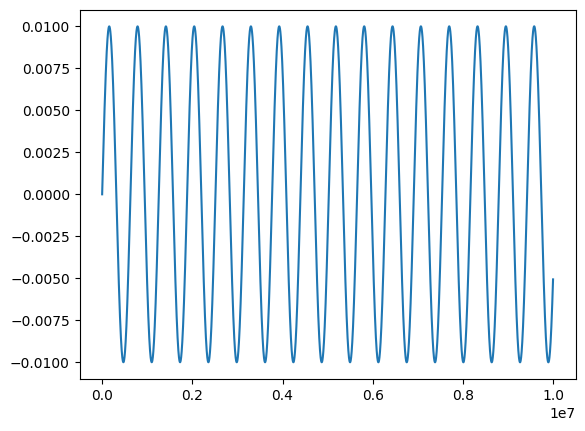

In [120]:
# Notice that this is a quick way to plot x,
# since I did not give the x-axis, plt plots x on the y-axis vs. array number on the x-axis.
plt.plot(x)

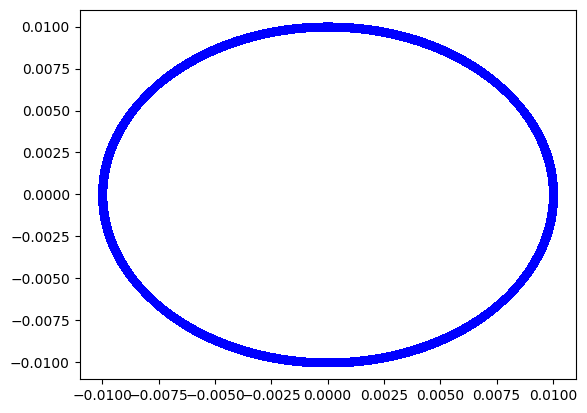

In [121]:
plt.plot(x,p,'b+')
#plt.axes().set_aspect('equal', 'datalim')

In [1]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

NameError: name 'Evolve_Many_Times' is not defined

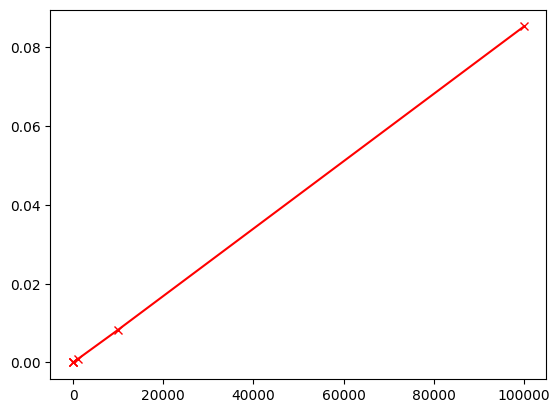

In [ ]:
#IF you plot it, there is a bunch of points at the origin...
plt.plot([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rx-')

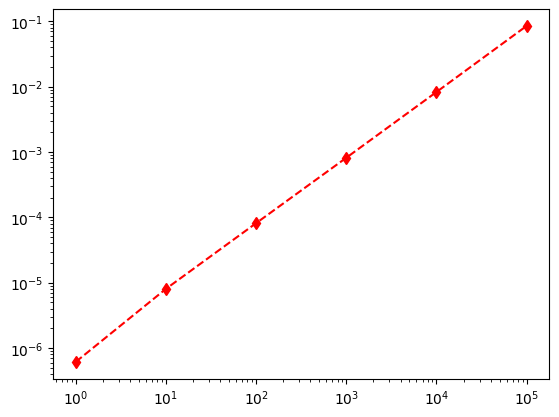

In [ ]:
# Use semilogy or loglog to visualize this better
plt.loglog([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rd--')

## We learnt from the basic numpy notebook that numpy typically is better at this stuff. So lets see if we can make things better?

# 3. Using Integrators 
#### (see https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html)

In [4]:
import numpy as np

# In integrators , typically you are trying to solve a 1st order vector ODE of the form $\dot{\vec{y}}=f(\vec{y})$. You need to define the RHS.

In [2]:
def deriv(u, t, omega_squared=4):
    "Provides derivative of vector u."
    xdot, x = u
    return (-omega_squared * x, xdot) 

In [3]:
from scipy.integrate import odeint
y0 = [1,0]
snapshot_dt = 0.1
ts = np.arange(0, 20, snapshot_dt)
scipysol = odeint(deriv, y0, ts)

In [ ]:
odeint?

Signature:
odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the function `

In [4]:
scipysol

array([[ 1.        ,  0.        ],
       [ 0.98006658,  0.09933468],
       [ 0.92106098,  0.19470918],
       [ 0.82533558,  0.28232124],
       [ 0.69670666,  0.35867804],
       [ 0.54030228,  0.42073548],
       [ 0.36235774,  0.46601953],
       [ 0.16996714,  0.49272485],
       [-0.02919951,  0.49978679],
       [-0.22720208,  0.4869238 ],
       [-0.4161468 ,  0.4546487 ],
       [-0.58850108,  0.4042482 ],
       [-0.73739369,  0.33773159],
       [-0.85688873,  0.25775069],
       [-0.94222233,  0.16749408],
       [-0.98999249,  0.07056001],
       [-0.99829478, -0.02918706],
       [-0.9667982 , -0.12777054],
       [-0.89675844, -0.22126021],
       [-0.79096774, -0.30592894],
       [-0.65364365, -0.37840124],
       [-0.49026086, -0.43578789],
       [-0.30733291, -0.47580104],
       [-0.11215257, -0.49684552],
       [ 0.08749895, -0.49808233],
       [ 0.28366216, -0.47946217],
       [ 0.46851666, -0.44172737],
       [ 0.63469288, -0.38638229],
       [ 0.7755659 ,

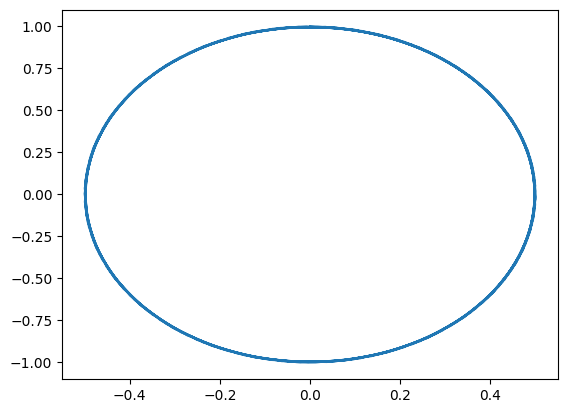

In [5]:
plt.plot(scipysol[:,1], scipysol[:, 0])

# 4. Doing things Smartly. Exponential of the evolution operator.

In [124]:
import numpy as np
from scipy.linalg import expm # This is the "exponential of an operator" function

In [ ]:
expm?

Signature: expm(A)
Docstring:
Compute the matrix exponential of an array.

Parameters
----------
A : ndarray
    Input with last two dimensions are square ``(..., n, n)``.

Returns
-------
eA : ndarray
    The resulting matrix exponential with the same shape of ``A``

Notes
-----
Implements the algorithm given in [1], which is essentially a Pade
approximation with a variable order that is decided based on the array
data.

For input with size ``n``, the memory usage is in the worst case in the
order of ``8*(n**2)``. If the input data is not of single and double
precision of real and complex dtypes, it is copied to a new array.

For cases ``n >= 400``, the exact 1-norm computation cost, breaks even with
1-norm estimation and from that point on the estimation scheme given in
[2] is used to decide on the approximation order.

References
----------
.. [1] Awad H. Al-Mohy and Nicholas J. Higham, (2009), "A New Scaling
       and Squaring Algorithm for the Matrix Exponential", SIAM J. Matrix


In [ ]:
expm(np.zeros((2,2)))

array([[1., 0.],
       [0., 1.]])

# Notice that you can write $\vec{z}(t)=e^{Mt}\vec{z}(0)$

In [127]:
def Integrate_Using_Exp(δt,m,ω):
        M=np.array([[0,1/m],[-m*(ω**2),0]]) # Evaluate the matrix
        Evolution=expm(M*δt) # Evaluate its exponential
        return Evolution # Return it.

array([[ 0.99500417,  0.09983342],
       [-0.09983342,  0.99500417]])

In [126]:
z0=np.random.rand(2,1) # Initialize the phase trajectory somewhere random in the unit circle.
z0

array([[0.33333486],
       [0.08436906]])

In [128]:
U=Integrate_Using_Exp(1e-5,1,1)
U

array([[ 1.e+00,  1.e-05],
       [-1.e-05,  1.e+00]])

In [132]:
def Evolve_Using_Numpy(U,z0,num):
    x=np.zeros(num)
    p=np.zeros(num)
    z=z0
    for i in range(num):
        x[i]=z[0]
        p[i]=z[1]
        z = U.dot(z)
    print(x)
    return(x,p)


In [133]:
Evolve_Using_Numpy(U,z0,10**5)

[0.33333486 0.33333571 0.33333655 ... 0.25110276 0.25110041 0.25109806]


/var/folders/wq/qy2mxf5n0xz3xq9pw609dfgw0000gp/T/ipykernel_1454/3073315213.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]=z[0]
/var/folders/wq/qy2mxf5n0xz3xq9pw609dfgw0000gp/T/ipykernel_1454/3073315213.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i]=z[1]


(array([0.33333486, 0.33333571, 0.33333655, ..., 0.25110276, 0.25110041,
        0.25109806]),
 array([ 0.08436906,  0.08436573,  0.0843624 , ..., -0.23489928,
        -0.2349018 , -0.23490431]))

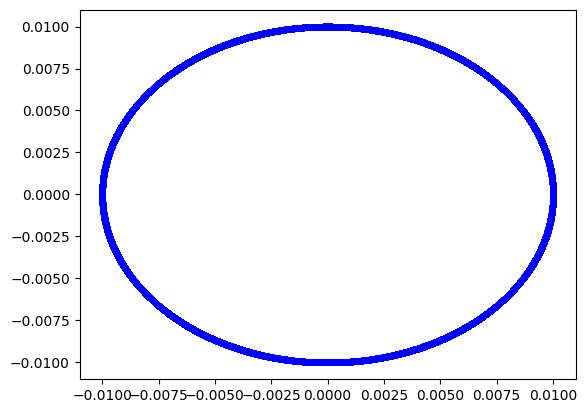

In [ ]:
plt.plot(x,p,'b.')
#plt.axes().set_aspect('equal', 'datalim')

In [ ]:
for i in range(6):
        %timeit Evolve_Using_Numpy(U,z0,10**i)

/var/folders/wq/qy2mxf5n0xz3xq9pw609dfgw0000gp/T/ipykernel_1092/1543753320.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]=z[0]
/var/folders/wq/qy2mxf5n0xz3xq9pw609dfgw0000gp/T/ipykernel_1092/1543753320.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i]=z[1]


2.19 μs ± 16.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.2 μs ± 310 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
165 μs ± 1.89 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.66 ms ± 29.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
16.3 ms ± 323 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
161 ms ± 997 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Comparing with before, nothing good seems to have been achieved. 
# Reason for that is we are not using vectorization properly. 
# We are still going through loops.

In [ ]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

475 ns ± 1.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
2.77 μs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
24.4 μs ± 62.5 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
265 μs ± 1.94 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.78 ms ± 128 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
27.8 ms ± 285 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
z0

array([[0.70459275],
       [0.45620347]])

In [ ]:
U

array([[ 1.e+00,  1.e-05],
       [-1.e-05,  1.e+00]])

In [ ]:
from numpy.linalg import matrix_power
matrix_power(U, 2).dot(z0).transpose()

array([[0.70460187, 0.45618938]])

In [ ]:
def Evolve_Using_Numpy_List_Comp(U,z0,num): # I have added List_Comp for list comprehension
    Z=[(matrix_power(U, i)).dot(z0).transpose() for i in range(num)]
    return Z

In [ ]:
Z=Evolve_Using_Numpy_List_Comp(U,z0,5)

In [ ]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

2.57 μs ± 32.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
37.4 μs ± 255 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
861 μs ± 11.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13.8 ms ± 158 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
198 ms ± 4.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Still no speedup. So whats happening?


In [ ]:
Dim = 10


In [ ]:
δt=1e-5
F = np.random.rand(Dim,Dim) +1j*np.random.rand(Dim,Dim) 
Fd=F.conj().T
H=F.dot(Fd)
U=expm(-1j*H*δt)

In [ ]:
z0=np.random.rand(Dim)

In [ ]:
U.dot(z0)

array([0.15970857-0.00022637j, 0.33174609-0.00025255j,
       0.88578381-0.00025593j, 0.66182555-0.00027232j,
       0.40230899-0.00026519j, 0.97098148-0.00026243j,
       0.03367708-0.00020586j, 0.08022156-0.00024862j,
       0.44834809-0.00023895j, 0.44792678-0.00020225j])

In [ ]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

3.18 μs ± 29.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
56.4 μs ± 1.11 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.33 ms ± 26.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
21.3 ms ± 438 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
305 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# EXERCISES: 
## Write a code to solve time dependant phase trajectory for damped SHO $\ddot{x}+\omega^2 x+\dot{x}=\epsilon\cos(\omega_d t)$

[[ 1.00000000e+00  0.00000000e+00]
 [ 1.00299803e+00  1.00150881e-03]
 [ 1.00599204e+00  2.00601374e-03]
 ...
 [-1.02051458e+00 -9.85092250e-01]
 [-1.01657213e+00 -9.86110804e-01]
 [-1.01262562e+00 -9.87125413e-01]]


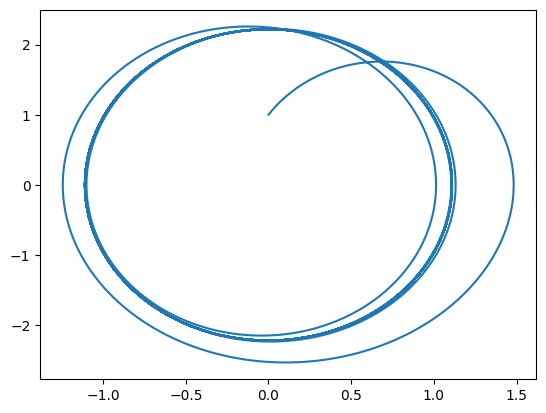

In [62]:
import numpy as np
w=1
wd=2
e=4
def Dsho(u,t):
    xdot, x = u                 
    return (-w**2*x-xdot+e*np.cos(wd*t),xdot ) 
y=[1,0]
t=np.linspace(0,100,100000)
inte=odeint(Dsho,y,t)
print(inte)
plt.plot(inte[:,1],inte[:,0])

In [ ]:
z0=np.array([1,0])

In [ ]:
θ=np.pi/3
M=np.array([[np.cos(θ),np.sin(θ)],[-np.sin(θ),np.cos(θ)]]) # Rotation matrix. 

In [2]:
def Repeat_Mul(M,z0,n):
    if n==0:
        return z0
    else:
        return M@Repeat_Mul(M,z0,n-1)

In [ ]:
for i in range(4):
    %timeit Repeat_Mul(M,z0,10**i) # Memory issues

1.18 μs ± 24.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
9.09 μs ± 272 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
85.2 μs ± 538 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
853 μs ± 22.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
def Repeat_Mul_2(M,z0,n):
    if n==1:
        return z0
    else:
        for i in range(1,n+1):
            z0 = M@z0
        return z0    

In [ ]:
for i in range(5):
    %timeit Repeat_Mul_2(M,z0,10**i) # Memory issues

51.8 ns ± 0.151 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
8.77 μs ± 79.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
83 μs ± 1.69 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
828 μs ± 17.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


KeyboardInterrupt: 

In [ ]:
Repeat_Mul_2(M,z0,136)

array([-0.5      ,  0.8660254])

# Using "List Comprehension" for time dependant Hamiltonians.

In [ ]:
t=np.linspace(0,10,100)
ω=np.pi/5

In [ ]:
σx=np.array([[0,1],[1,0]])
σz=np.array([[1,0],[0,-1]])

In [ ]:
H=[σz+np.cos(ω*t0)*σx for t0 in t]

In [ ]:
H[54]

array([[ 1.        , -0.95949297],
       [-0.95949297, -1.        ]])

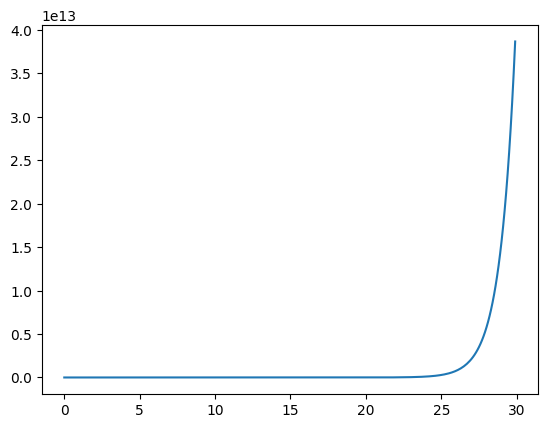

In [54]:
from scipy.integrate import odeint
def differn(u,t):
    dxdt=u
    return u
y=4
t=np.arange(0,30,0.1)
v=odeint(differn,y,t)
plt.plot(t,v)


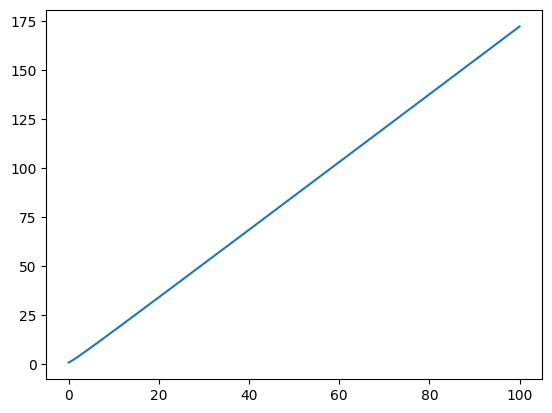

In [17]:

from scipy.integrate import odeint
def force(u,t):
    xdot, x= u
    return 1/x**2 ,xdot
y=[1,1]
t=np.linspace(0,100,1000)
sol=odeint(force,y,t)
plt.plot(t,sol[:,1])